In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2018-2020.csv', engine = 'python', encoding='utf-8', sep=';').reset_index()

In [3]:
df.columns = ['get_nov.mail_type', 'get_nov.mr_from', 'get_nov.ufps_from', 'get_nov.mail_rank','get_nov.dat_priem','get_nov.cnt',
             'get_nov.type_of_client', 'get_nov.pay_type', 'get_nov.direction', 'get_nov.forward_price', 'get_nov.tax_price', 'get_nov.price'] 

In [4]:
#задаем фильтры: только посылки кэш не служебные. задаем формат даты
df = df.loc[(df['get_nov.mail_type'].isin(['Посылка', 'Посылка 1-го класса', 'Посылка Легкий возврат', 'Посылка курьер EMS', 'Посылка онлайн', 'Посылка стандарт', 'Посылка экспресс']))]
df = df.loc[df['get_nov.mail_rank']=='Не служебное']
df = df.loc[df['get_nov.pay_type']=='non-cash']
df = df.loc[df['get_nov.ufps_from']!='АО "ПОЧТА РОССИИ"']
df['get_nov.dat_priem'] = pd.to_datetime(df['get_nov.dat_priem'])
df.loc[df['get_nov.direction']=='EXP','get_nov.mail_type'] = 'Посылка мжд'


In [5]:
df = df[df['get_nov.type_of_client']=='ФК']

In [6]:
prod_mix = pd.pivot_table(df, values = 'get_nov.cnt', index = 'get_nov.dat_priem', columns = ['get_nov.mail_type'],  aggfunc = sum).fillna(0).loc['2020-01-01':]

In [7]:
prod_mix['all'] = prod_mix.sum(axis = 1) 
prod_mix['month'] = prod_mix.index.month

In [8]:
prod_mix['month'] = prod_mix.index.month

In [9]:
prod_mix_01 = prod_mix[prod_mix['month']==1]
prod_mix_02 = prod_mix[prod_mix['month']==2]
prod_mix_03 = prod_mix[prod_mix['month']==3]
prod_mix_04 = prod_mix[prod_mix['month']==4]
prod_mix_05 = prod_mix[prod_mix['month']==5]
prod_mix_06 = prod_mix[prod_mix['month']==6]

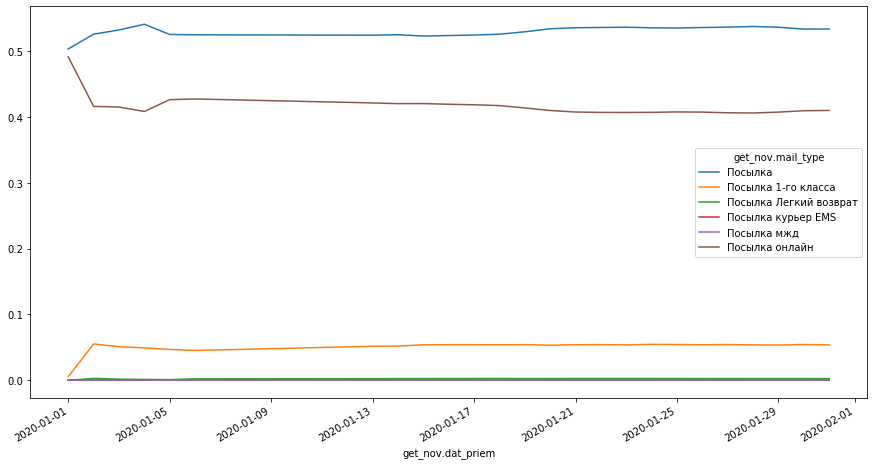

In [10]:
prod_mix_01_cum = prod_mix_01.iloc[:,:-1]
for i in range(1,len(prod_mix_01_cum)):
    for k in range(len(prod_mix_01_cum.T)):
        prod_mix_01_cum.iloc[i,k] = prod_mix_01_cum.iloc[i-1,k] + prod_mix_01_cum.iloc[i,k]

for i in range(len(prod_mix_01_cum.T)-1):
    prod_mix_01_cum.iloc[:,i] = prod_mix_01_cum.iloc[:,i] / prod_mix_01_cum.iloc[:,-1] 

prod_mix_01_cum.iloc[:,:-1].plot(figsize = (15,8))

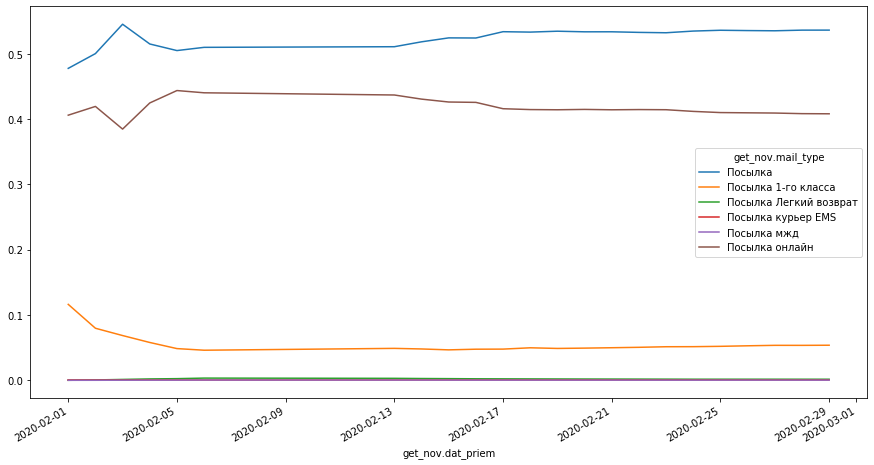

In [11]:
prod_mix_02_cum = prod_mix_02.iloc[:,:-1]
for i in range(1,len(prod_mix_02_cum)):
    for k in range(len(prod_mix_02_cum.T)):
        prod_mix_02_cum.iloc[i,k] = prod_mix_02_cum.iloc[i-1,k] + prod_mix_02_cum.iloc[i,k]

for i in range(len(prod_mix_02_cum.T)-1):
    prod_mix_02_cum.iloc[:,i] = prod_mix_02_cum.iloc[:,i] / prod_mix_02_cum.iloc[:,-1] 

prod_mix_02_cum.iloc[:,:-1].plot(figsize = (15,8))

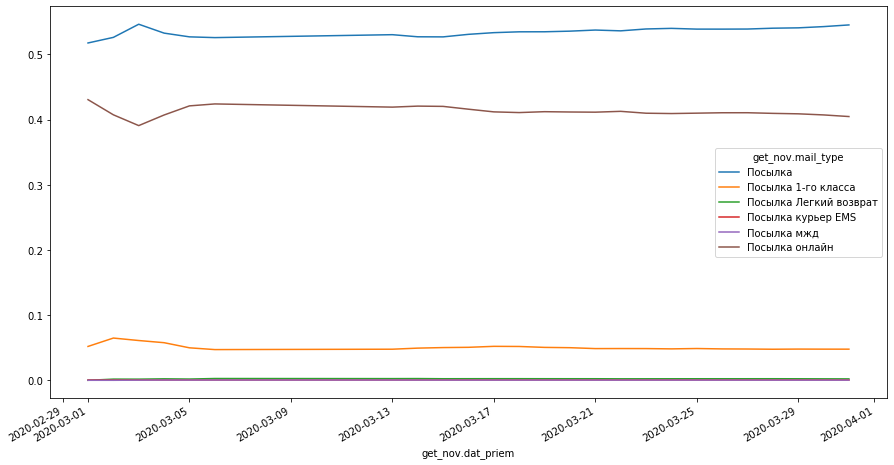

In [12]:
prod_mix_03_cum = prod_mix_03.iloc[:,:-1]
for i in range(1,len(prod_mix_03_cum)):
    for k in range(len(prod_mix_03_cum.T)):
        prod_mix_03_cum.iloc[i,k] = prod_mix_03_cum.iloc[i-1,k] + prod_mix_03_cum.iloc[i,k]

for i in range(len(prod_mix_03_cum.T)-1):
    prod_mix_03_cum.iloc[:,i] = prod_mix_03_cum.iloc[:,i] / prod_mix_03_cum.iloc[:,-1] 

prod_mix_03_cum.iloc[:,:-1].plot(figsize = (15,8))

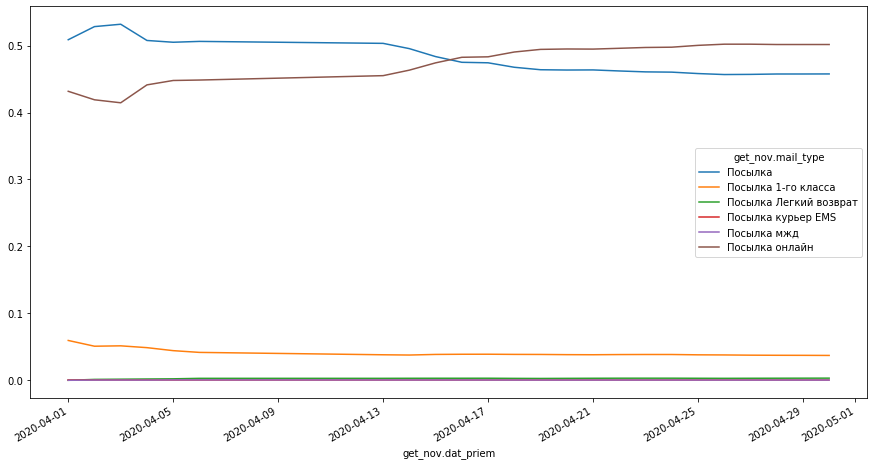

In [13]:
prod_mix_04_cum = prod_mix_04.iloc[:,:-1]
for i in range(1,len(prod_mix_04_cum)):
    for k in range(len(prod_mix_04_cum.T)):
        prod_mix_04_cum.iloc[i,k] = prod_mix_04_cum.iloc[i-1,k] + prod_mix_04_cum.iloc[i,k]

for i in range(len(prod_mix_04_cum.T)-1):
    prod_mix_04_cum.iloc[:,i] = prod_mix_04_cum.iloc[:,i] / prod_mix_04_cum.iloc[:,-1] 

prod_mix_04_cum.iloc[:,:-1].plot(figsize = (15,8))

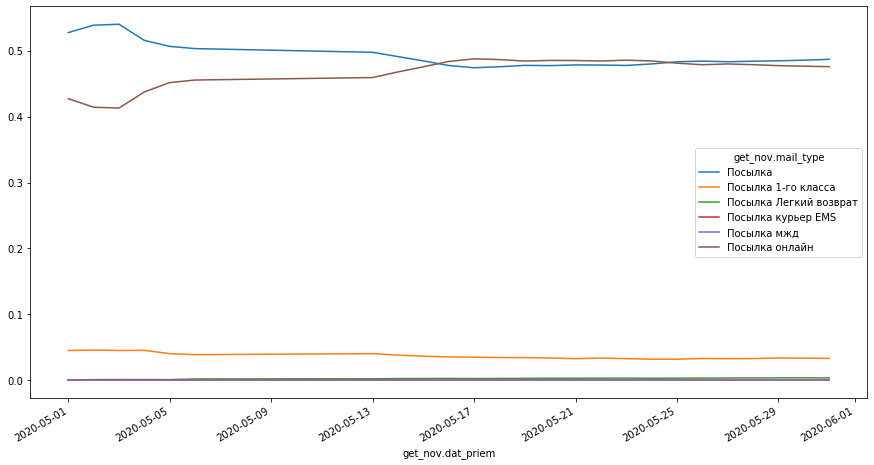

In [14]:
prod_mix_05_cum = prod_mix_05.iloc[:,:-1]
for i in range(1,len(prod_mix_05_cum)):
    for k in range(len(prod_mix_05_cum.T)):
        prod_mix_05_cum.iloc[i,k] = prod_mix_05_cum.iloc[i-1,k] + prod_mix_05_cum.iloc[i,k]

for i in range(len(prod_mix_05_cum.T)-1):
    prod_mix_05_cum.iloc[:,i] = prod_mix_05_cum.iloc[:,i] / prod_mix_05_cum.iloc[:,-1] 

prod_mix_05_cum.iloc[:,:-1].plot(figsize = (15,8))

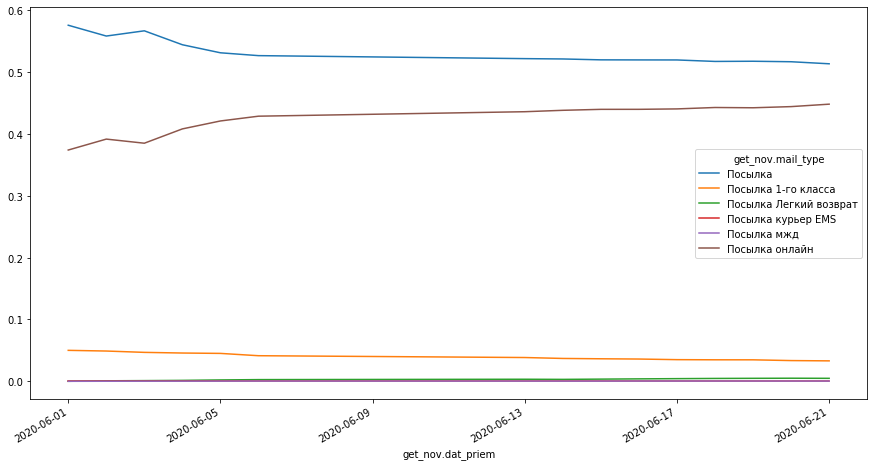

In [15]:
prod_mix_06_cum = prod_mix_06.iloc[:,:-1]
for i in range(1,len(prod_mix_06_cum)):
    for k in range(len(prod_mix_06_cum.T)):
        prod_mix_06_cum.iloc[i,k] = prod_mix_06_cum.iloc[i-1,k] + prod_mix_06_cum.iloc[i,k]

for i in range(len(prod_mix_06_cum.T)-1):
    prod_mix_06_cum.iloc[:,i] = prod_mix_06_cum.iloc[:,i] / prod_mix_06_cum.iloc[:,-1] 

prod_mix_06_cum.iloc[:,:-1].plot(figsize = (15,8))

In [16]:
prod_mix_06_cum

get_nov.mail_type,Посылка,Посылка 1-го класса,Посылка Легкий возврат,Посылка курьер EMS,Посылка мжд,Посылка онлайн,all
get_nov.dat_priem,,,,,,,
2020-06-01,0.575889,0.050069,0.000000,0.0,0.000000,0.374042,90316.0
2020-06-02,0.558405,0.048959,0.000814,0.0,0.000093,0.391729,194060.0
2020-06-03,0.566853,0.046794,0.001119,0.0,0.000159,0.385075,308332.0
2020-06-04,0.544331,0.045731,0.001504,0.0,0.000209,0.408225,378362.0
2020-06-05,0.531314,0.045134,0.002219,0.0,0.000278,0.421056,450261.0
2020-06-06,0.526724,0.041391,0.002734,0.0,0.000368,0.428784,535144.0
2020-06-13,0.521871,0.038456,0.003329,0.0,0.000326,0.436017,606742.0
2020-06-14,0.521330,0.036964,0.003123,0.0,0.000294,0.438290,684584.0
2020-06-15,0.519912,0.036428,0.003528,0.0,0.000289,0.439844,772710.0


In [17]:
prod_mix.sum()

get_nov.mail_type
Посылка                    7653075.0
Посылка 1-го класса         661269.0
Посылка Легкий возврат       42117.0
Посылка курьер EMS               0.0
Посылка мжд                   4589.0
Посылка онлайн             6632125.0
all                       14993175.0
month                          799.0
dtype: float64